In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
filename=r'C:\Users\hp\Downloads\cleanedDATA.csv'
df=pd.read_csv(filename)

In [169]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,std,turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,low,0,1,1,0


In [170]:
from sklearn.linear_model import LinearRegression

# Highway-L/100km help us predict car price

In [171]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
X=df[['highway-L/100km']]

In [173]:
Y=df[['price']]

**LINEAR MODEL USING HIGHWAY=L/100km**  

In [175]:
lm.fit(X,Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**OUTPUT PREDICTION**

In [122]:
Yhat=lm.predict(X)    
Yhat[0:5]

array([[15485.52737455],
       [15485.52737455],
       [16643.34931414],
       [12475.19033163],
       [22327.2024721 ]])

In [123]:
lm.intercept_

array([-14617.84305466])

In [124]:
lm.coef_

array([[3458.68511314]])

## Another example using the engine-size and the price

In [125]:
lm1=LinearRegression()
lm1.fit(df[['engine-size']],df[['price']])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
lm1.intercept_

array([-7963.33890628])

In [127]:
lm1.coef_

array([[166.86001569]])

# MULTIPLE LINEAR REGRESSION

In [128]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [129]:
lm3=LinearRegression()

In [130]:
lm3.fit(Z,df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
lm3.intercept_


array([-14386.53083927])

In [132]:
lm3.coef_

array([[ 36.60566451,   3.50008296,  85.38595269, 500.93378897]])

In [133]:
lm3.predict(Z)[0:5]

array([[14055.06243297],
       [14055.06243297],
       [18637.81129128],
       [10757.99101342],
       [16670.72808522]])

# Visualization of the above developed models

In [134]:
import seaborn as sns
%matplotlib inline

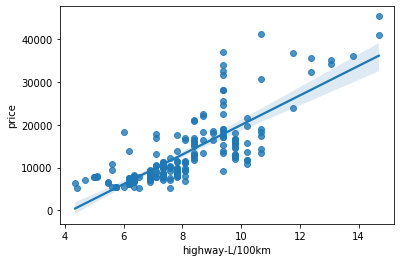

In [135]:
sns.regplot(x=df[['highway-L/100km']],y=df[['price']],data=df)

**In order to increase the widht and the height of the map**

(0, 47714.21300428084)

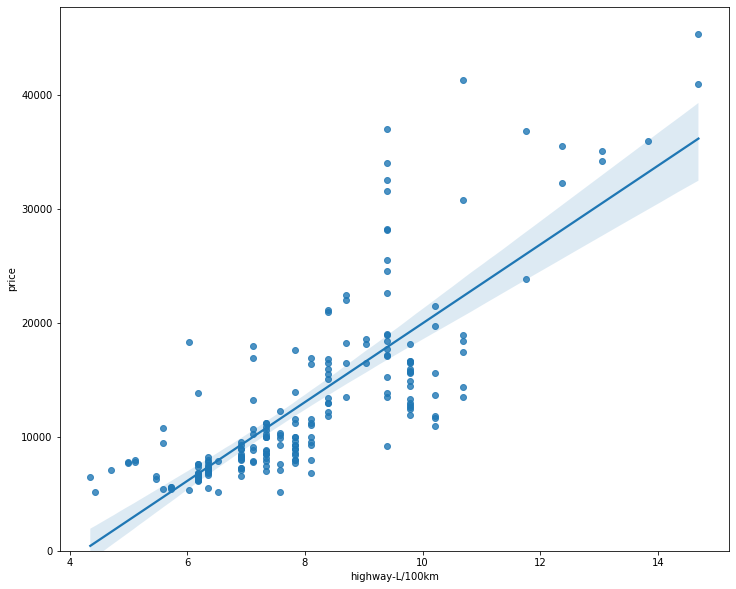

In [136]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.ylim(0,)

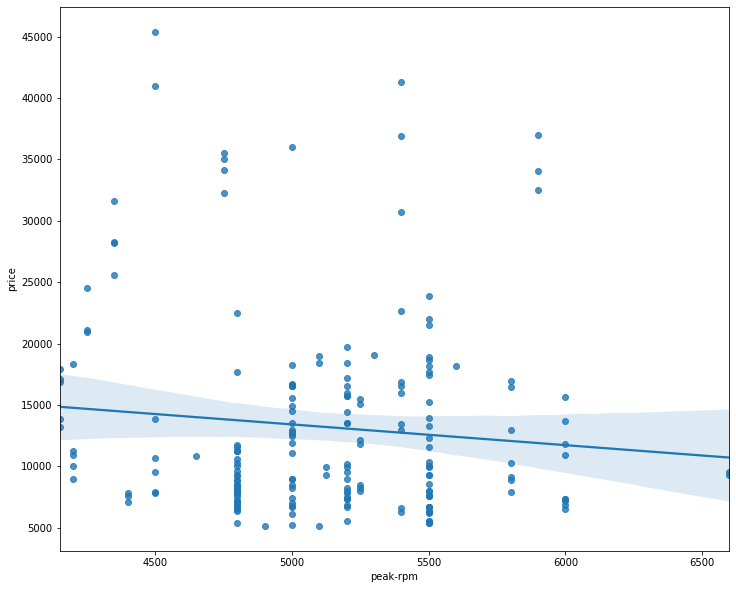

In [137]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)

In [138]:
df[["peak-rpm","highway-L/100km","price"]].corr()

,peak-rpm,highway-L/100km,price
peak-rpm,1.000000,0.017694,-0.101616
highway-L/100km,0.017694,1.000000,0.801118
price,-0.101616,0.801118,1.000000


# Residual Plot

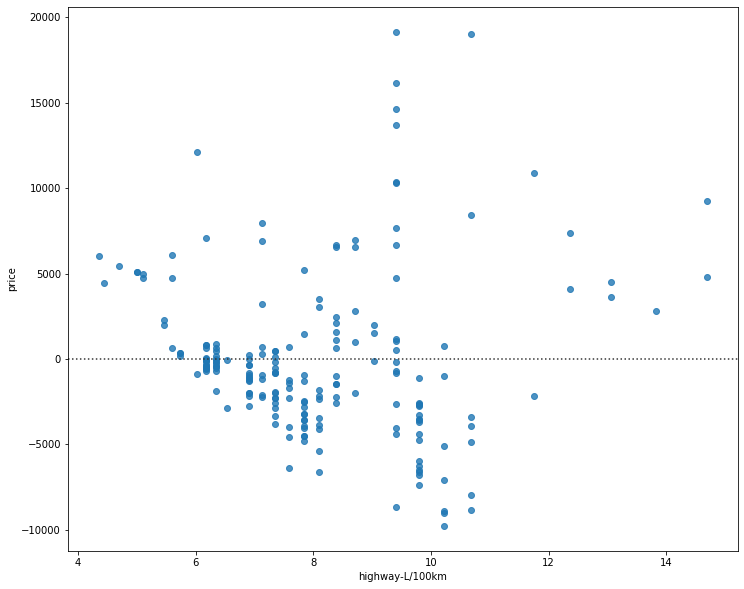

In [139]:
plt.figure(figsize=(width,height))
sns.residplot(df['highway-L/100km'],df['price'])
plt.show()

# VISUALIZATION Of Multiple Linear Regression

**THIS IS DONE USING THE DISTRIBUTION PLOT**

In [140]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
lm4=LinearRegression()
lm4.fit(Z,df['price'])
Y_hat=lm4.predict(Z)

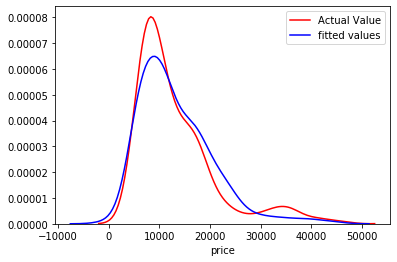

In [141]:
ax1=sns.distplot(df['price'],hist=False,color='r',label='Actual Value')
sns.distplot(Y_hat,hist=False,color='b',label='fitted values',ax=ax1)


# POLYNOMIAL REGRESSION

In [142]:
x = df['highway-L/100km']
y = df['price']


In [143]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


In [144]:
from sklearn.preprocessing import PolynomialFeatures

In [145]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [146]:
Z_pr=pr.fit_transform(Z)

In [147]:
Z.shape

(201, 4)

In [148]:
Z_pr.shape

(201, 15)

# Pipeline

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [150]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('regression',LinearRegression())]

In [151]:
pipe=Pipeline(Input)

In [152]:
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

**normalize the data, perform a transform and fit the model simultaneously.**

In [153]:
pipe.fit(Z,df['price'])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

**normalize the data, perform a transform and produce a prediction simultaneously**

In [154]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12395.42815338, 12395.42815338, 18421.01425398,  9978.89064447])

# How do we determine the accuracy of the above predicted models?
## Two important measures are
### R-SQUARED
### MEAN SQUARE ERROR(MSE)

**for linear and multiple regression only**

In [155]:
lm5=LinearRegression()
lm5.fit(df[['highway-L/100km']],df[['price']])

#r-square is given as

lm5.score(df[['highway-L/100km']],df[['price']])



0.6417894513258818

In [156]:
yhat=lm5.predict(df[['highway-L/100km']])
yhat[0:4]

array([[15485.52737455],
       [15485.52737455],
       [16643.34931414],
       [12475.19033163]])

In [157]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df['price'],yhat)

In [158]:
mse


22510543.777085222

**for polynomial fit only**

In [159]:
from sklearn.metrics import r2_score
X=df['highway-L/100km']
Y=df['price']
r_squared=r2_score(Y,p(X))
r_squared

0.675358166081217

In [160]:
mean_squared_error(df['price'], p(X))

20401030.18001941

In [161]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [188]:
new_input=np.arrange(1,100,1).reshape(-1, 1)

AttributeError: module 'numpy' has no attribute 'arrange'

In [ ]:
lm.fit(X,Y)
lm

In [185]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[12474.03743659]])

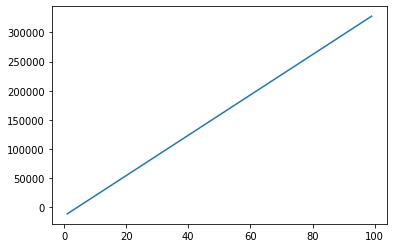

In [182]:
plt.plot(new_input,yhat)
plt.show()